# Estructura del evento

## Inicio

- (Presentador), cede la palabra al doctor Julián Enrique Pinilla Malagón Personero de Bogotá, D.C.

- (Presentador), cede la palabra al ingeniero Edgar Martín Cubides Director de Tecnologías de la Información y las Comunicaciones con el TEMA CONFERENCIA: Evolución Oficina Tecnología.

- (presentador), cede la palabra al ingeniero Juan Carlos Parada Gallardo Alta Consejería Distrital de TIC con el TEMA CONFERENCIA: POLÍTICA BOGOTÁ TERRITORIO INTELIGENTE

- (presentador) presenta y cede la palabra al ingeniero TEMA CONFERENCIA: CIBERSEGURIDAD

- (Presentador), cede la palabra al ingeniero Oscar Cortes de Fortinet Colombia con el TEMA CONFERENCIA: DESAFÍOS EN LA CIBERSEGURIDAD EN EL CONTEXTO DE LAS CIUDADES INTELIGENTES Y LA INTELIGENCIA ARTIFICIAL.


## 10:30 am – 10:45 BREAK

- (Presentador) presenta y cede la palabra al ingeniero Fabian Enrique Villalobos Nieto de ETB con el TEMA CONFERENCIA:  CIUDADES INTELIGENTES UNA EXPERIENCIA MÁS HUMANA EN ATENCIÓN AL CLIENTE

- (Presentador) presenta y cede la palabra al ingeniero Julián Andrés Villarraga Plazas de Microsoft con el TEMA CONFERENCIA: INTELIGENCIA ARTIFICIAL AL SERVICIO DE LA COMUNIDAD Y LA INNOVACIÓN.

- (Presentador) presenta y cede la palabra al ingeniero Luis González de Red Hat con el TEMA CONFERENCIA: AUTOMATIZACIÓN Y MICRO SERVICIOS APALANCAN EL CAMBIO.


## 12:30 m – 2:00 ALMUERZO

- (Presentador), cede la palabra a la doctora Paula Andrea Girón Uribe Personera Auxiliar

- (presentador) presenta y cede la palabra al doctor Juan Felipe Yepes – Experto en innovación publica gobierno abierto TEMA CONFERENCIA: GOBIERNO ABIERTO


## PANEL: RETOS Y LOGROS EN LA INNOVACIÓN PÚBLICA EN BOGOTÁ

- SANTIAGO AMADOR Director IBO-Laboratorio de Innovación Pública (15 minutos) TEMA CONFERENCIA: IBO como experiencia

- JUAN JOSE MARTÍNEZ GUERRERO – Profesional Veeduría Distrital (15 minutos) TEMA CONFERENCIA:  

- JORGE REYES PIMIENTO – Experto en Innovación Innpactia (15 minutos) TEMA CONFERENCIA: “Innovar en contextos de problemas sistémicos con tecnología”

- NATALIA ANDREA GALINDO ALONSO – Directora de Relaciones con el Sector Educativo Privado -  / SACE - Sistema de Alianzas y Cooperación Escolar. (15 minutos) TEMA CONFERENCIA: Caso de éxito “Sistema de Alianzas y Cooperación Escolar SACE"


## 3:45 pm – 4:00 pm BREAK

- Conversatorio
- 20 minutos para resolver preguntas de los asistentes
- Fin del evento.

# Análisis

## Librerías

In [302]:
'''
!pip3 install pandas
!pip3 install seaborn
!pip3 install plotly
#'''

import pandas as pd
import json
import os
import plotly.graph_objects as go
import plotly.express as px
import random
import matplotlib.pyplot as plt

In [303]:
from google.colab import drive
drive.mount('/content/drive')

ruta='/content/drive/Shareddrives/VDLab/2023/ComponentesProyectoInversionLABcapital/3.ComponenteCoCreacion/2.Índice de Innovación Pública 2023/Seguimentos/15. Charlas/19-10-2023/Análisis/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Funciones

In [304]:
diccionario_entidad_sector = {
    "Alcaldia Local De Antonio Narino": "Sector descentralizado territorialmente",
    "Alcaldia Local De Barrios Unidos": "Sector descentralizado territorialmente",
    "Alcaldia Local De Bosa": "Sector descentralizado territorialmente",
    "Alcaldia Local De Chapinero": "Sector descentralizado territorialmente",
    "Alcaldía Local De Ciudad Bolívar": "Sector descentralizado territorialmente",
    "Alcaldia Local De Engativa": "Sector descentralizado territorialmente",
    "Alcaldia Local De Fontibon": "Sector descentralizado territorialmente",
    "Alcaldia Local De Kennedy": "Sector descentralizado territorialmente",
    "Alcaldia Local De La Candelaria": "Sector descentralizado territorialmente",
    "Alcaldia Local De Los Martires": "Sector descentralizado territorialmente",
    "Alcaldia Local De Puente Aranda": "Sector descentralizado territorialmente",
    "Alcaldia Local De Rafael Uribe Uribe": "Sector descentralizado territorialmente",
    "Alcaldia Local De San Cristobal": "Sector descentralizado territorialmente",
    "Alcaldia Local De Santa Fe": "Sector descentralizado territorialmente",
    "Alcaldia Local De Suba": "Sector descentralizado territorialmente",
    "Alcaldia Local De Sumapaz": "Sector descentralizado territorialmente",
    "Alcaldia Local De Teusaquillo": "Sector descentralizado territorialmente",
    "Alcaldia Local De Tunjuelito": "Sector descentralizado territorialmente",
    "Alcaldia Local De Usaquen": "Sector descentralizado territorialmente",
    "Alcaldia Local De Usme": "Sector descentralizado territorialmente",
    "Caja De Vivienda Popular": "Hábitat",
    "Canal Capital": "Cultura, Recreación y Deporte",
    "Capital Salud": "Salud",
    "Departamento Administrativo De La Defensoria Del Espacio Publico": "Gobierno",
    "Departamento Administrativo Del Servicio Civil Distrital": "Gestión Pública",
    "Empresa De Acueducto Y Alcantarillado De Bogota": "Hábitat",
    "Empresa De Renovacion Urbana Y Desarrollo Urbano De Bogota": "Hábitat",
    "Empresa De Transporte Del Tercer Milenio": "Movilidad",
    "Empresa Metro De Bogota": "Movilidad",
    "Fondo De Prestaciones Economicas Cesantias Y Pensiones": "Hacienda",
    "Fundacion Gilberto Alzate Avendano": "Cultura, Recreación y Deporte",
    "Instituto De Desarrollo Urbano": "Movilidad",
    "Instituto Distrital De Gestion De Riesgos Y Cambio Climatico": "Ambiente",
    "Instituto Distrital De Las Artes": "Cultura, Recreación y Deporte",
    "Instituto Distrital De Participacion Y Accion Comunal": "Gobierno",
    "Instituto Distrital De Patrimonio Cultural": "Cultura, Recreación y Deporte",
    "Instituto Distrital De Proteccion Y Bienestar Animal": "Ambiente",
    "Instituto Distrital De Recreacion Y Deporte": "Cultura, Recreación y Deporte",
    "Instituto Distrital De Turismo": "Desarrollo Económico, Industria y Turismo",
    "Instituto Distrital Para La Economia Social": "Desarrollo Económico, Industria y Turismo",
    "Instituto Distrital Para La Investigacion Educativa Y El Desarrollo Pedagogico": "Educación",
    "Instituto Distrital Para La Proteccion De La Ninez Y La Juventud": "Integración Social",
    "Jardin Botanico Jose Celestino Mutis": "Ambiente",
    "Orquesta Filarmonica De Bogota": "Cultura, Recreación y Deporte",
    "Personeria De Bogota": "Órganos de Control",
    "Secretaria De Educacion Del Distrito": "Educación",
    "Secretaria Distrital De Ambiente": "Ambiente",
    "Secretaria Distrital De Cultura Recreacion Y Deporte": "Cultura, Recreación y Deporte",
    "Secretaria Distrital De Desarrollo Economico": "Desarrollo Económico, Industria y Turismo",
    "Secretaria Distrital De Gobierno": "Gobierno",
    "Secretaria Distrital De Habitat": "Hábitat",
    "Secretaria Distrital De Hacienda": "Hacienda",
    "Secretaria Distrital De Integracion Social": "Integración Social",
    "Secretaria Distrital De La Mujer": "Mujeres",
    "Secretaria Distrital De Movilidad": "Movilidad",
    "Secretaria Distrital De Planeacion": "Planeación",
    "Secretaria Distrital De Salud": "Salud",
    "Secretaria Distrital De Seguridad Convivencia Y Justicia": "Seguridad, Convivencia y Justicia",
    "Secretaria General De La Alcaldia Mayor De Bogota": "Gestión Pública",
    "Secretaria Juridica Distrital": "Gestión Jurídica",
    "Subred Integrada De Servicios De Salud Centro Oriente": "Salud",
    "Subred Integrada De Servicios De Salud Norte": "Salud",
    "Subred Integrada De Servicios De Salud Sur": "Salud",
    "Subred Integrada De Servicios De Salud Sur Occidente": "Salud",
    "Unidad Administrativa Especial Cuerpo Oficial De Bomberos De Bogota": "Seguridad, Convivencia y Justicia",
    "Unidad Administrativa Especial De Catastro": "Hacienda",
    "Unidad Administrativa Especial De Rehabilitacion Y Mantenimiento Vial": "Movilidad",
    "Unidad Administrativa Especial De Servicios Publicos": "Hábitat",
    "Universidad Distrital Francisco Jose De Caldas": "Educación",
    "Veeduria Distrital": "Órganos de Control"
}


In [305]:
archivos_originales= os.listdir(f'{ruta}/separadas/')
'''
for i in archivos_originales:
  print(f'Iniciando proceso para {i}')
  target_df=pd.read_excel(f'{ruta}/separadas/{i}')
  target_df['sector'] = target_df['entidad'].map(diccionario_entidad_sector)
  entidad_column = target_df.pop('sector')
  target_df.insert(0, 'sector', entidad_column)
  target_df.to_excel(f'{ruta}/separadas/{i}',index=False)
#'''

"\nfor i in archivos_originales:\n  print(f'Iniciando proceso para {i}')\n  target_df=pd.read_excel(f'{ruta}/separadas/{i}')\n  target_df['sector'] = target_df['entidad'].map(diccionario_entidad_sector)\n  entidad_column = target_df.pop('sector')\n  target_df.insert(0, 'sector', entidad_column)\n  target_df.to_excel(f'{ruta}/separadas/{i}',index=False)\n#"

In [306]:
archivos_originales= os.listdir(f'{ruta}/raiz/')
'''
for i in archivos_originales:
  print(f'Iniciando proceso para {i}')
  target_df=pd.read_excel(f'{ruta}/raiz/{i}')
  target_df['sector'] = target_df['entidad'].map(diccionario_entidad_sector)
  entidad_column = target_df.pop('sector')
  target_df.insert(0, 'sector', entidad_column)
  target_df.to_excel(f'{ruta}/raiz/{i}',index=False)
#'''

"\nfor i in archivos_originales:\n  print(f'Iniciando proceso para {i}')\n  target_df=pd.read_excel(f'{ruta}/raiz/{i}')\n  target_df['sector'] = target_df['entidad'].map(diccionario_entidad_sector)\n  entidad_column = target_df.pop('sector')\n  target_df.insert(0, 'sector', entidad_column)\n  target_df.to_excel(f'{ruta}/raiz/{i}',index=False)\n#"

## Análisis básico

### Presupuesto

#### Presupuesto por sector

In [307]:
respuestas_raw=pd.read_excel(f'{ruta}/raiz/respuestas_2023.xlsx')
respuestas_raw['funcionamiento']=respuestas_raw[['p3_val_1', 'p3_val_2']].mean(axis=1)
respuestas_raw['funcionamiento_innovacion']=respuestas_raw[['p4_val_1', 'p4_val_2']].mean(axis=1)

respuestas_raw['inversion']=respuestas_raw[['p5_val_1', 'p5_val_2']].mean(axis=1)
respuestas_raw['inversion_innovacion']=respuestas_raw[['p6_val_1', 'p6_val_2']].mean(axis=1)

respuestas_raw['presupuesto_general']=respuestas_raw[['funcionamiento', 'inversion']].mean(axis=1)
respuestas_raw['presupuesto_general_innovacion']=respuestas_raw[['funcionamiento_innovacion', 'inversion_innovacion']].mean(axis=1)

presupuesto_funcionamiento_sector=respuestas_raw.groupby('sector')['funcionamiento'].mean()
presupuesto_funcionamiento_innovacion_sector=respuestas_raw.groupby('sector')['funcionamiento_innovacion'].mean()

presupuesto_inversion_sector=respuestas_raw.groupby('sector')['inversion'].mean()
presupuesto_inversion_innovacion_sector=respuestas_raw.groupby('sector')['inversion_innovacion'].mean()

presupuesto_general_sector=respuestas_raw.groupby('sector')['presupuesto_general'].median()
presupuesto_general_innovacion_sector=respuestas_raw.groupby('sector')['presupuesto_general_innovacion'].median()

respuestas_raw.sample(2)

sector  \
10  Sector descentralizado territorialmente   
25                                  Hábitat   

                                            entidad  p1  p2      p3_val_1  \
10                  Alcaldia Local De Puente Aranda   0   1  0.000000e+00   
25  Empresa De Acueducto Y Alcantarillado De Bogota   1   1  1.849510e+12   

        p3_val_2      p4_val_1      p4_val_2      p5_val_1      p5_val_2  ...  \
10  8.730000e+07  0.000000e+00  8.730000e+07  0.000000e+00  8.730000e+07  ...   
25  2.148144e+12  2.682134e+09  1.434930e+09  1.666038e+12  2.158510e+12  ...   

    p39                                 _uuid  \
10    0  0ac22659-e454-444e-9333-9e0b6b1731c6   
25    1  8e512352-7788-420d-9f94-e0ba1018820f   

                                               mision  \
10  La Secretaría Distrital de Gobierno lidera la ...   
25  Agua para la vida, generando bienestar para la...   

                                               vision  funcionamiento  \
10  En el 2024 la Secretaría Distrital de Gobierno...    4.365000e+07   
25  Excelencia en la gestión empresarial del agua,...    1.998827e+12   

    funcionamiento_innovacion     inversion  inversion_innovacion  \
10               4.365000e+07  4.365000e+07          4.365000e+07   
25               2.058532e+09  1.912274e+12          7.364818e+09   

    presupuesto_general  presupuesto_general_innovacion  
10         4.365000e+07                    4.365000e+07  
25         1.955550e+12                    4.711675e+09  

[2 rows x 66 columns]

In [308]:
entidades=respuestas_raw[['entidad','sector','presupuesto_general']]

fig = px.sunburst(entidades, path=['sector', 'entidad'], values='presupuesto_general', color='sector',
)
fig.show()

In [319]:
entidades_filtered = entidades[entidades['presupuesto_general'] > 0]

fig = px.treemap(
    names = entidades_filtered['entidad'],
    parents = entidades_filtered['sector'],
    values= entidades_filtered['presupuesto_general']
)
fig.show()

In [310]:
funcionamiento = px.bar(pd.DataFrame({'sector': presupuesto_funcionamiento_sector.index, 'presupuesto de funcionamiento': presupuesto_funcionamiento_sector.values}),
             x='presupuesto de funcionamiento',
             y='sector',
             color_discrete_sequence=['blue'],
             title='Presupuesto de funcionamiento por sector')

funcionamiento_innovacion = px.bar(pd.DataFrame({'sector': presupuesto_funcionamiento_innovacion_sector.index, 'presupuesto de funcionamiento para innovacion': presupuesto_funcionamiento_innovacion_sector.values}),
             x='presupuesto de funcionamiento para innovacion',
             y='sector',
             color_discrete_sequence=['orange'],
             title='Presupuesto de funcionamiento para innovación por sector')

inversion = px.bar(pd.DataFrame({'sector': presupuesto_inversion_sector.index, 'presupuesto de inversion': presupuesto_inversion_sector.values}),
             x='presupuesto de inversion',
             y='sector',
             color_discrete_sequence=['green'],
             title='Presupuesto de inversión por sector')

inversion_innovacion = px.bar(pd.DataFrame({'sector': presupuesto_inversion_innovacion_sector.index, 'presupuesto de inversion para innovacion': presupuesto_inversion_innovacion_sector.values}),
             x='presupuesto de inversion para innovacion',
             y='sector',
             color_discrete_sequence=['red'],
             title='Presupuesto de inversión para innovación por sector')

general = px.bar(pd.DataFrame({'sector': presupuesto_general_sector.index, 'presupuesto general': presupuesto_general_sector.values}),
             x='presupuesto general',
             y='sector',
             color_discrete_sequence=['green'],
             title='Presupuesto general por sector')

general_innovacion = px.bar(pd.DataFrame({'sector': presupuesto_general_innovacion_sector.index, 'presupuesto general para innovacion': presupuesto_general_innovacion_sector.values}),
             x='presupuesto general para innovacion',
             y='sector',
             color_discrete_sequence=['red'],
             title='Presupuesto general para innovación por sector')

In [311]:
funcionamiento_contra_innovacion=funcionamiento
placeholder_funcionamiento_contra_innovacion=funcionamiento_innovacion

funcionamiento_contra_innovacion.update_traces(name='Funcionamiento', showlegend=True)
placeholder_funcionamiento_contra_innovacion.update_traces(name='Funcionamiento en Innovación', showlegend=True)

funcionamiento_contra_innovacion.add_traces(placeholder_funcionamiento_contra_innovacion.data)

funcionamiento_contra_innovacion.update_layout(barmode='overlay')

# Show the bar chart with four layers
funcionamiento_contra_innovacion.show()

In [312]:
inversion_contra_innovacion=inversion
placeholder_inversion_contra_innovacion=inversion_innovacion

inversion_contra_innovacion.update_traces(name='Presupuesto de Inversión', showlegend=True)
placeholder_inversion_contra_innovacion.update_traces(name='Presupuesto de Inversión en Innovación', showlegend=True)

inversion_contra_innovacion.add_traces(placeholder_inversion_contra_innovacion.data)

inversion_contra_innovacion.update_layout(barmode='overlay')

# Show the bar chart with four layers
inversion_contra_innovacion.show()

In [313]:
general_contra_innovacion=general
placeholder_general_contra_innovacion=general_innovacion

general_contra_innovacion.update_traces(name='Presupuesto general', showlegend=True)
placeholder_general_contra_innovacion.update_traces(name='Presupuesto general en Innovación', showlegend=True)

general_contra_innovacion.add_traces(placeholder_general_contra_innovacion.data)

general_contra_innovacion.update_layout(barmode='overlay')

# Show the bar chart with four layers
general_contra_innovacion.show()

#### Herramientas de innovación

In [314]:
p13_unclean=pd.read_excel(f'{ruta}/separadas/repeat_p13.xlsx')
p13=p13_unclean.rename(columns={'p13_nom':'nombre','p13_des':'descripcion','p13_cos':'costo',}).drop(columns=['_submission__uuid'])
p13_filtrado = p13[p13['costo'] > 0]
promedio_sector_unformatted=p13_filtrado.groupby('sector')['costo'].mean()
promedio_sector_unformatted

sector
Ambiente                                     1.261575e+08
Cultura, Recreación y Deporte                1.642400e+08
Desarrollo Económico, Industria y Turismo    1.947439e+08
Educación                                    4.892642e+09
Gestión Jurídica                             2.485094e+08
Gestión Pública                              5.771898e+08
Gobierno                                     1.846474e+09
Hacienda                                     2.468162e+09
Hábitat                                      1.720611e+08
Integración Social                           1.997544e+08
Movilidad                                    9.360959e+08
Mujeres                                      2.314769e+08
Planeación                                   3.010781e+08
Salud                                        3.397306e+08
Sector descentralizado territorialmente      1.701344e+08
Seguridad, Convivencia y Justicia            4.214066e+09
Órganos de Control                           2.825340e+08
Name: c

In [315]:
fig = px.bar(pd.DataFrame({'sector': promedio_sector_unformatted.index, 'costo': promedio_sector_unformatted.values}),
             x='costo',
             y='sector',
             color_discrete_sequence=['orange'],
             labels={'costo': 'Promedio de gasto del sector', 'sector': 'Sector'},
             title='Gasto en herramientas digitales por sector')

# Show the plot
fig.show()

In [316]:
promedio_general = promedio_sector_unformatted.mean().astype(int).round(decimals=0)
print(f'Promedio gastado distrito: ${promedio_general:,d}\n')

Promedio gastado distrito: $1,021,473,526



In [317]:
def animated_histogram_with_bins(df, ordenar_por_entidad=False):
  average_spending_by_entity = df.groupby('sector')['costo'].mean()

  # Sort the entities by average spending on digital platforms in descending order.
  average_spending_by_entity = average_spending_by_entity.sort_values(ascending=False)

  # Select the top 10 entities.
  top_10_entities = average_spending_by_entity.index[:10]

  # Create a bar chart with the top 10 entities on the x-axis and the average spending on digital platforms on the y-axis.
  plt.bar(top_10_entities, average_spending_by_entity[top_10_entities])
  plt.xlabel('Entity')
  plt.ylabel('Average spending on digital platforms')
  plt.title('Top 10 entities by average spending on digital platforms')
  plt.show()



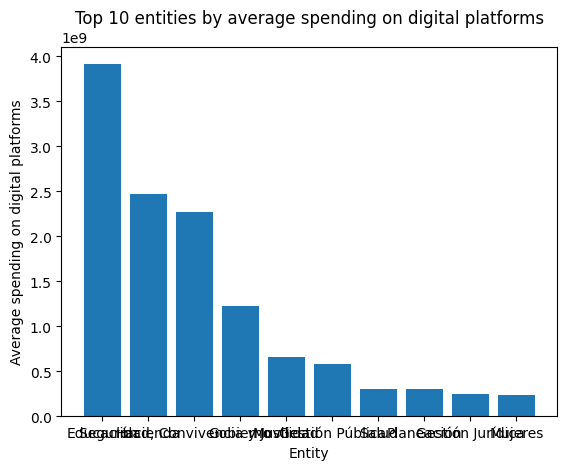

In [318]:
animated_histogram_with_bins(p13,True)